### Áp dụng Canny cho các loại ảnh khác nhau:
○ Ảnh có nhiều nhiễu, ảnh có độ tương phản
thấp, ảnh có nhiều chi tiết.
###

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import random_noise

## 1. Tạo các loại ảnh test

In [2]:
# Load ảnh mẫu từ scikit-image
base_image = data.camera()

# Tạo 3 loại ảnh test
test_images = {
    'original': base_image.copy(),  # 1. Ảnh gốc (nhiều chi tiết)
    'noisy': (random_noise(base_image, mode='gaussian', var=0.01) * 255).astype(np.uint8),  # 2. Ảnh nhiễu
    'low_contrast': cv2.normalize(base_image, None, 60, 180, cv2.NORM_MINMAX)  # 3. Ảnh tương phản thấp
}

print("✓ Đã tạo các ảnh test:")
for name, img in test_images.items():
    print(f"  • {name}: {img.shape}")

✓ Đã tạo các ảnh test:
  • original: (512, 512)
  • noisy: (512, 512)
  • low_contrast: (512, 512)


## 2. Hiển thị các ảnh gốc

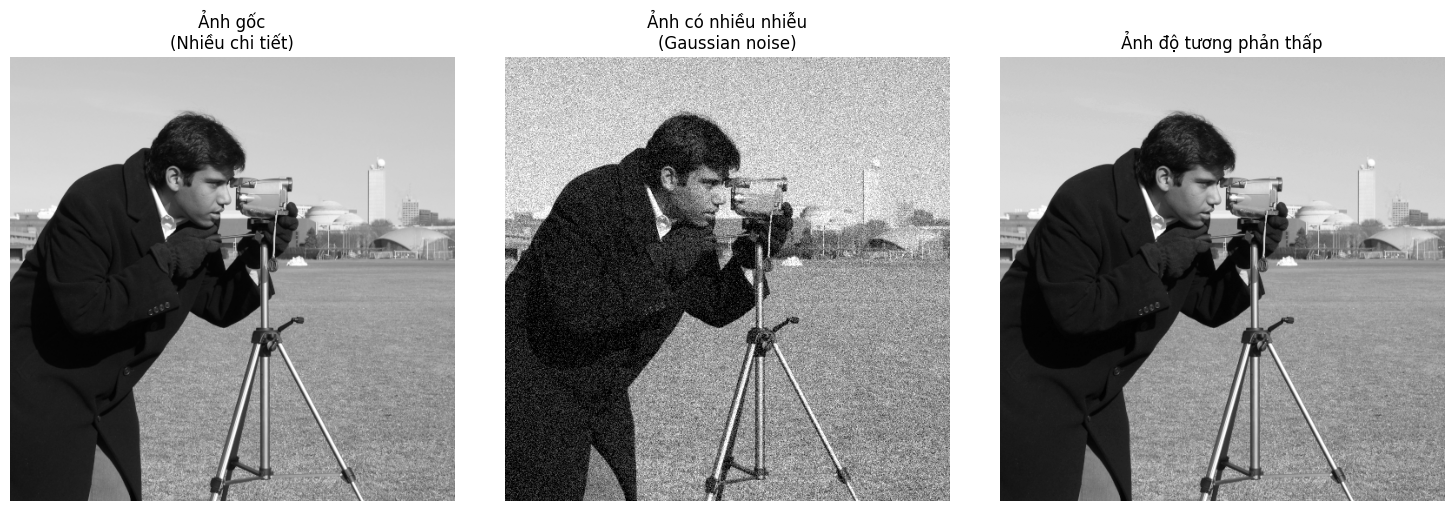

In [3]:
# Cấu hình hiển thị
display_config = [
    (test_images['original'], 'Ảnh gốc\n(Nhiều chi tiết)'),
    (test_images['noisy'], 'Ảnh có nhiều nhiễu\n(Gaussian noise)'),
    (test_images['low_contrast'], 'Ảnh độ tương phản thấp')
]

plt.figure(figsize=(15, 5))
for idx, (img, title) in enumerate(display_config, 1):
    plt.subplot(1, 3, idx)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

## 3. Áp dụng Canny Edge Detection

***cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)***

Trong đó:
- **image** : Ảnh đầu vào sẽ được áp dụng bộ lọc Canny.
- **T_lower** : Giá trị ngưỡng thấp hơn trong ngưỡng trễ.
- **T_upper** : Giá trị ngưỡng trên trong ngưỡng trễ.
- **aperture_size** : Kích thước khẩu độ của bộ lọc Sobel (Chỉ định kích thước của nhân Sobel được sử dụng để tính toán độ dốc ).
- **L2Gradient** : Tham số Boolean được sử dụng để tính toán độ chính xác cao hơn cho độ dốc cạnh.

Giá trị trả về : 
Trả về một hình ảnh với các cạnh được phát hiện, trong đó các cạnh được đánh dấu màu trắng (255) và các vùng không phải cạnh được đánh dấu màu đen (0).

In [4]:
# Ngưỡng Canny
threshold1, threshold2 = 50, 150
aperture_size = 5 
L2Gradient = True

# Áp dụng Canny cho tất cả các ảnh
edges = {
    # name: cv2.Canny(img, threshold1, threshold2)
    name: cv2.Canny(img, threshold1, threshold2, apertureSize=aperture_size, L2gradient=L2Gradient)
    for name, img in test_images.items()
}

print(f"✓ Đã áp dụng Canny (threshold: {threshold1}, {threshold2})")

✓ Đã áp dụng Canny (threshold: 50, 150)


## 4. So sánh kết quả

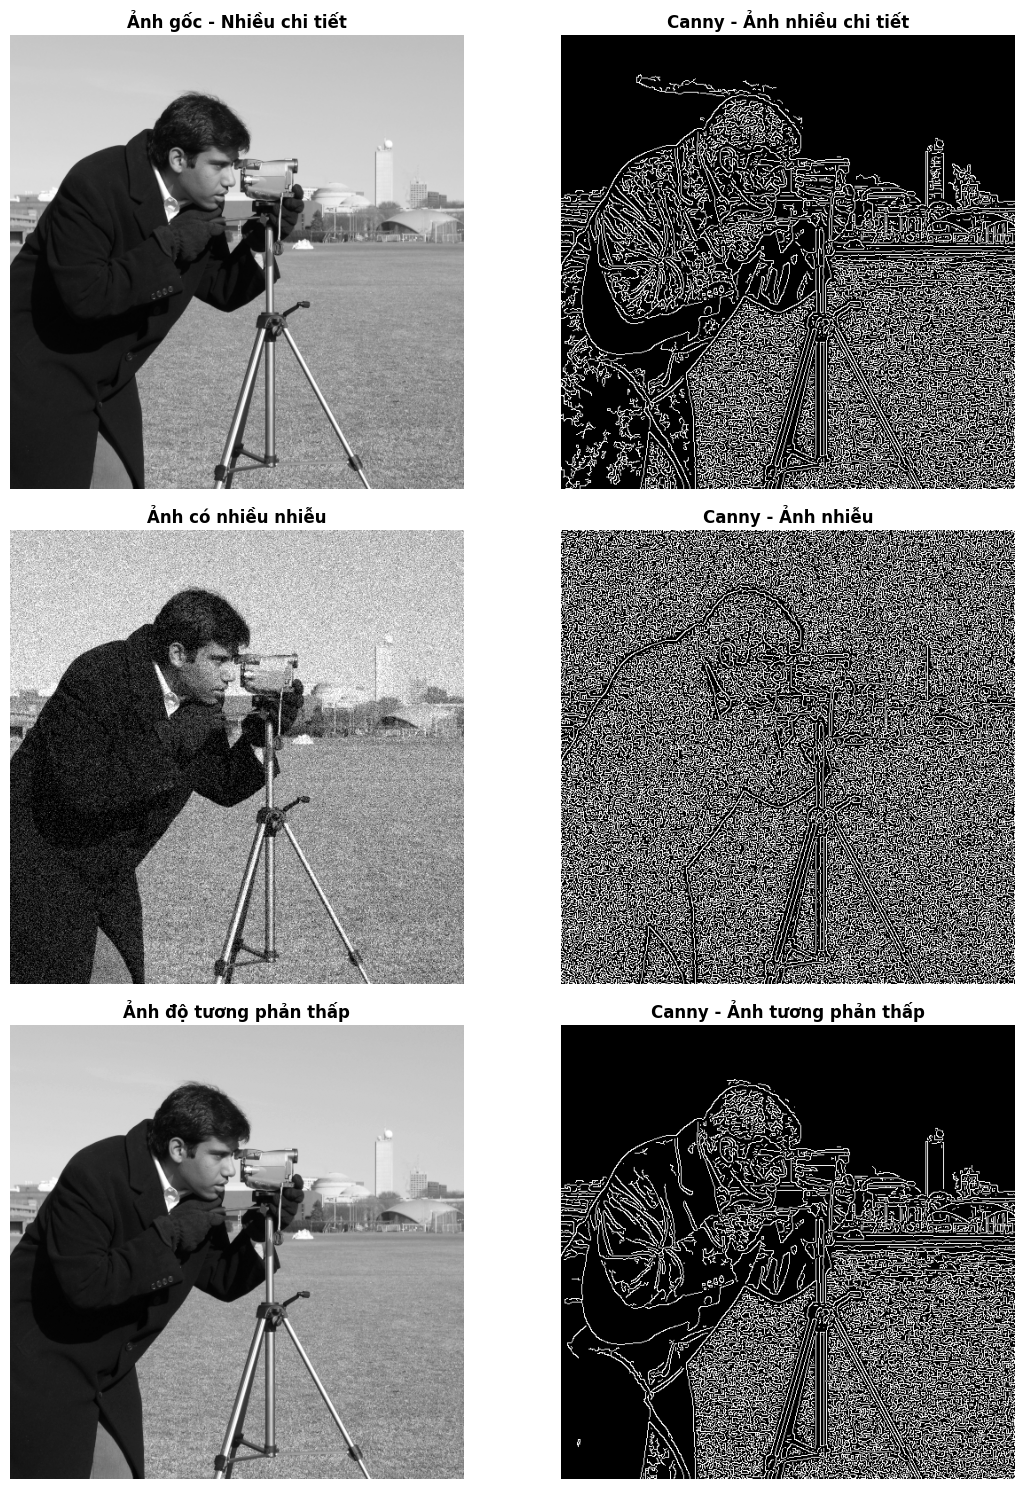

In [5]:
# Cấu hình so sánh
comparison_config = [
    ('original', 'Ảnh gốc - Nhiều chi tiết', 'Canny - Ảnh nhiều chi tiết'),
    ('noisy', 'Ảnh có nhiều nhiễu', 'Canny - Ảnh nhiễu'),
    ('low_contrast', 'Ảnh độ tương phản thấp', 'Canny - Ảnh tương phản thấp')
]

fig, axes = plt.subplots(3, 2, figsize=(12, 15))

for row, (img_key, title_orig, title_edge) in enumerate(comparison_config):
    # Ảnh gốc
    axes[row, 0].imshow(test_images[img_key], cmap='gray')
    axes[row, 0].set_title(title_orig, fontsize=12, weight='bold')
    axes[row, 0].axis('off')
    
    # Ảnh sau Canny
    axes[row, 1].imshow(edges[img_key], cmap='gray')
    axes[row, 1].set_title(title_edge, fontsize=12, weight='bold')
    axes[row, 1].axis('off')

plt.tight_layout()
plt.show()